# Load Profile Forecasting

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./data_oct20.csv", parse_dates = ["date"])
data.head(2)

,L2_react,L2,L,L_react,NS4949_export,L2_active_import,PV,Wind_speed,Temperature,Global_irradiance,Plane_irradiance,Module_temp,Bat_current,Bat_energy,Battery_SOC,Battery_voltage,Battery_charge,Battery_discharge,date,L1
0,-1.672253,8.917166,105.823796,-1.330095,103.75,7.5,0.003709,5.0,1.885714,0.017964,0.018072,0.000171,-0.181818,762.249603,69.649998,751.549988,0.000042,0.000031,2020-10-01 01:00:00,96.906629
1,-1.672253,8.917166,105.823796,-1.330095,103.75,7.5,0.003709,5.0,1.885714,0.017964,0.018072,0.000171,-0.181818,762.249603,69.649998,751.549988,0.000042,0.000031,2020-10-01 01:01:00,96.906629


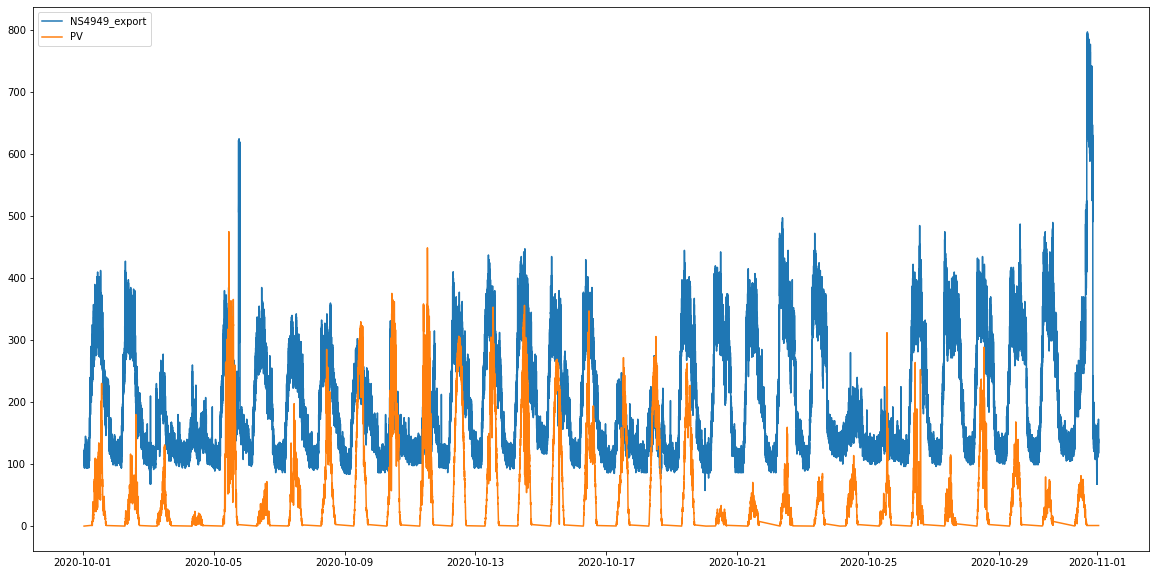

In [3]:
def plot_series_in_df(df, series):
    t = df.date
    for serie in series:
        plt.plot(t, df[serie].values)
        
    plt.legend(series)

plt.figure(figsize = (20, 10))
plot_series_in_df(data, ["NS4949_export", "PV"])

In [91]:
def get_average_day(df, column, sample_period = 1):
    """
    Extracts the days and returns the average day
    """
    
    num_datapoints = 24*60/sample_period
    days = []
    grouped = df.groupby([df.date.dt.floor('d')], as_index = False)
    for day, group in grouped:
        if len(group) != 1440:
            continue
        days.append(group[column].values)
        
    return np.asarray(days).mean(axis = 0).shape
        
    
get_average_day(data, "L1")
    

(1440,)
